# FPLCPlot (FPLC Chromatogram plotting tool)
*Interactive Jupyter notebok interface to FPLCPlot.*

An interactive Jupyter  notebook to plot chromatograms outputted from **GE Life Sciences / Amersham Biosciences UNICORN 5.X** software. To use this notebook, simply output an `.XLS` file from the UNICORN software, containing all curves / traces (i.e. UV absorbance, conductivity, Temperature, etc.). Save this file in the same directory as the `.ipynb` file for this notebook, and re-run the cells.

### Dependencies
- Python 2.7 or newer
- Matplotlib
- Seaborn
- NumPy
- Pandas
- ipywidgets

In [1]:
%matplotlib inline
from fplcplot.chromatogram import plotTraces

### Importing Excel files in current directory
By default, all Excel files in the current directory are loaded into a Python list, which will be overlay plotted on the same figure. To exclude an Excel file, simply move the file temporarily to another directory.

In [11]:
file_list = !ls *A.xls
file_list

['Protein A.xls']

To plot your figure, simply run the below cell to generate a series of iPython widgets as interface to FPLCPlot. Any changes made to the parameters on the plot are shown after pressing the `Run plotTraces` button. (**Note:** Interactive widgets are not visible in online notebook viewers such as on GitHub. Launch this notebook locally to view the widgets.)

#### Overview of widgets
Name | Description
-----|-----
Title | Title for figure. Latex supported by enclosing in `$$`
Save file? | Check to save file in same directory. File name is according to first Excel file used in plotting figure.
File format | File format for outputted file. `.PNG` or `.PDF` supported.
Lower y-limit | Lower limit on y-axis for UV absorption trace
Upper y-limit | Upper limit on y-axis for UV absorption trace
2nd trace | Choice for plotting curve on second y-axis. <br> `buffer_b` plots the percentage of buffer B on the second y-axis <br> `buffer_b_abs` plots the actual concentration resulting from mixture of buffer A and B (This requires correct values in the buffer B sliders below). <br> `conductivity` plots the percentage conductivity on the second y-axis.
*Buffer A (mM) | The absolute value in concentration for competitor in buffer A in mM.
*Buffer B (mM) | The absolute value in concentration for competitor in buffer B in mM.

***Note**: Values for Buffer A and Buffer B must be correct when plotting using the `buffer_b_abs` setting, as these values are used to calculate the actual concentration of the competitor in solution (e.g. imidazole).


Protein A.png outputted.


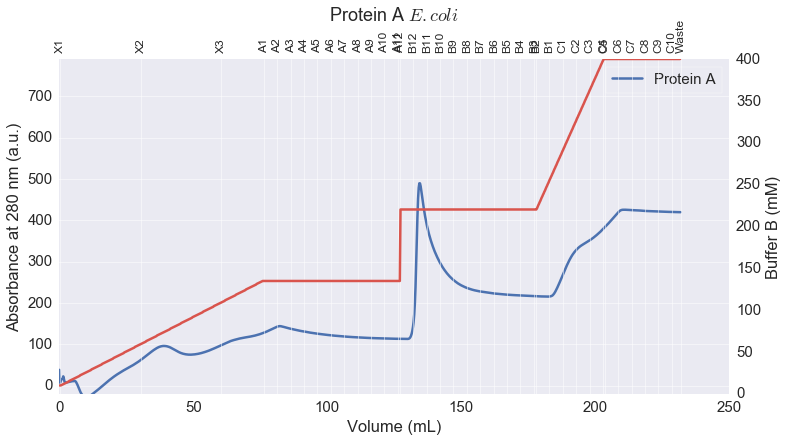

In [12]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

from IPython.display import display

interact(plotTraces, file_list=fixed(file_list), 
         title=widgets.Text("Protein A $E. coli$", description='Title:'),
         output=widgets.Checkbox(value=False, description="Save file?"),
         f_format=widgets.Dropdown(options=['.png', '.pdf'], description='File format:'),
         y_lower=widgets.IntSlider(min=-200,max=100,step=10,value=-20, 
                                   description='Lower y-limit:'),
         y_upper=widgets.IntSlider(min=-10,max=4500,step=50,value=2000, 
                                   description='Upper y-limit:'),
         second_trace=widgets.ToggleButtons(options=['None','buffer_b',
                                                     'buffer_b_abs',
                                                     'conductivity'], 
                                            description='2nd trace:'),
         buffer_A=widgets.IntSlider(min=0,max=500,step=10,value=10, 
                                   description='Buffer A (mM):'),
         buffer_B=widgets.IntSlider(min=0,max=3000,step=10,value=400, 
                                   description='Buffer B (mM):'),
         __manual=True)